#### Imports

In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.set_printoptions(3)

In [2]:
FILE_PATH = "data/train.csv"

### Lightweight Data Wrangling

In [3]:
data = pd.read_csv(FILE_PATH).iloc[:, 1:]  # removing the first Id column

### Dimensions

In [4]:
len(data.columns), len(data)

(80, 1460)

### Response to predict

(array([ 34900., 129975., 163000., 214000., 755000.]), 0)

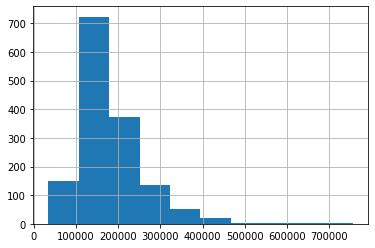

In [5]:
y_vec = data["SalePrice"].values
plt.hist(y_vec)
plt.grid()
np.quantile(y_vec, [0.0, 0.25, 0.5, 0.75, 1.0]), np.isnan(y_vec).sum()

12.105816833620844

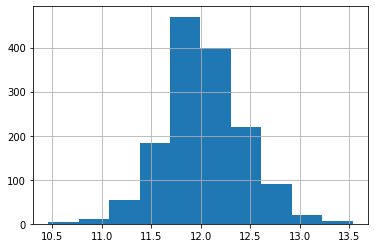

In [6]:
plt.hist(np.log(y_vec))
plt.grid()
np.log(y_vec.mean())

12.024050901109383


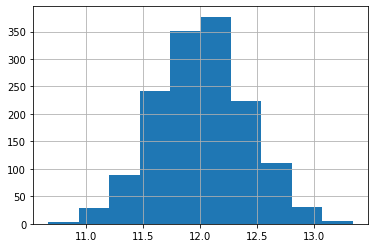

In [7]:
log_y = np.log(y_vec)
mean = log_y.mean()
print(mean)
std = log_y.std()
samples = np.random.randn(len(data))
synthetic = std * samples + mean
plt.hist(synthetic)
plt.grid()

- no pathological values for y
- log transforming the response gives us a nicely normal distribution to predict

### Column types

In [8]:
n_cols = len(data.columns)
numerical_cols = [
    col
    for col in data.columns
    if (
        "int64" == data.loc[:, col].dtype
        or "float64" == data.loc[:, col].dtype
    )
]
len(numerical_cols), numerical_cols

(37,
 ['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'])

In [9]:
data.loc[:, numerical_cols].isna().sum(0)

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
transforms = [('MSSubClass', 'scale'), ('LotFrontage', 'isna'), ('LotArea', 'lognorm'), ('OverallQual', 'scale'), ('OverallCond', 'lognorm'), ('YearBuilt', 'scale'), ('YearRemodAdd', 'scale'), ('MasVnrArea', 'is0'), ('BsmtFinSF1', 'is0'), ('BsmtFinSF2', 'is0'), ('BsmtUnfSF', 'scale'), ('1stFlrSF', 'lognorm'), ('2ndFlrSF', 'is0'), ('GrLivArea', 'lognorm'), ('BsmtFullBath', 'scale'), ('FullBath', 'embed'), ('HalfBath', 'embed'), ('BedroomAbvGr', 'scale'), ('TotRmsAbvGrd', 'lognorm'), ('Fireplaces', 'scale'), ('GarageYrBlt', 'isna'), ('GarageCars', 'scale'), ('GarageArea', 'scale'), ('WoodDeckSF', 'is0'), ('OpenPorchSF', 'is0'), ('EnclosedPorch', 'is0'), ('3SsnPorch', 'is0'), ('PoolArea', 'is0'), ('MiscVal', 'is0'), ('MoSold', 'scale'), ('YrSold', 'embed')]

for col in data.columns:
    datacol = data[col]
    if datacol.dtype == "object":
        print(f"col name {col}")
        print(f"num NaN {datacol.isna().sum()}")
        unique_vals = datacol.astype(str).unique()
        print(unique_vals)
        if len(unique_vals) <= 4:
            transforms.append((col, "embed"))
            print("adding")
        print("*" * 15)

col name MSZoning
num NaN 0
['RL' 'RM' 'C (all)' 'FV' 'RH']
***************
col name Street
num NaN 0
['Pave' 'Grvl']
adding
***************
col name Alley
num NaN 1369
['nan' 'Grvl' 'Pave']
adding
***************
col name LotShape
num NaN 0
['Reg' 'IR1' 'IR2' 'IR3']
adding
***************
col name LandContour
num NaN 0
['Lvl' 'Bnk' 'Low' 'HLS']
adding
***************
col name Utilities
num NaN 0
['AllPub' 'NoSeWa']
adding
***************
col name LotConfig
num NaN 0
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
***************
col name LandSlope
num NaN 0
['Gtl' 'Mod' 'Sev']
adding
***************
col name Neighborhood
num NaN 0
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
***************
col name Condition1
num NaN 0
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
******

In [11]:
import json
import os

with open(os.path.join("data", "transforms"), "w") as jfile:
    json.dump(transforms, jfile)